# Multi-layer Perceptron Classifier for df_merged_zero_15x15_final

# Table of Contents<a class="anchor" id="Contents"></a>
* [Load Packages](#Packages)
* [Load Dataset](#Dataset)
    * [Train Test Validation Split](#Train_Test_Validation_Split)
* [Functions](#Functions)
* [Multi-layer Perceptron Classifier](#MLP)
    * [Run the Model](#Run_MLP)
    * [ROC Curve and Precision-Recall Curve](#Curve_MLP)
    * [Results](#Results_MLP)
* [Multi-layer Perceptron Classifier with PCA](#PCA)

# Load Packages<a class="anchor" id="Packages"></a>

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.metrics import RocCurveDisplay, auc, roc_auc_score, make_scorer, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.metrics import silhouette_score
from keras.optimizers import Adam
import random
import csv
import statistics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.utils.class_weight import compute_class_weight
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [2]:
# from joblib import load

# best_mlp = load('best_model/best_mlp_mean.joblib')
# best_mlp_pc = load('best_model/best_mlp_mean_pc.joblib')

* [Table of Contents](#Contents)

# Load Dataset<a class="anchor" id="Dataset"></a>

In [16]:
df_merged_mean_15x15 = pd.read_csv('data/df_merged_zero_15x15_final.csv')
df_merged_mean_15x15

,site,time,riskLevelLabel,BBP_1x1_median,CDM_1x1_median,SPM_1x1_median,KD490_1x1_median,ZSD_1x1_median,CHL_1x1_median,BBP_1x1_mean,...,SPM_15x15_q1,KD490_15x15_q1,ZSD_15x15_q1,CHL_15x15_q1,BBP_15x15_q3,CDM_15x15_q3,SPM_15x15_q3,KD490_15x15_q3,ZSD_15x15_q3,CHL_15x15_q3
0,ukc1101-06000,2020-05-14,0,0.014399,0.648437,9.016005,0.720255,1.359252,26.936116,0.014399,...,5.846387,0.720255,1.359252,26.936116,0.014399,0.648437,5.846387,0.720255,1.359252,26.936116
1,ukc1101-06000,2020-05-15,0,0.000000,0.000000,8.102808,0.393628,1.778462,10.588528,0.000000,...,8.102808,0.393628,1.778462,10.588528,0.000000,0.000000,8.102808,0.393628,1.778462,10.588528
2,ukc1101-06000,2020-05-16,0,0.000000,0.000000,1.135922,0.263305,2.588783,5.632908,0.000000,...,1.135922,0.263305,2.588783,5.632908,0.000000,0.000000,1.135922,0.263305,2.588783,5.632908
3,ukc1101-06000,2020-05-17,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ukc1101-06000,2020-05-18,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187106,ukk4307-33900,2022-09-26,0,0.000000,0.000000,7.356489,0.183889,3.869243,3.158081,0.000000,...,7.356489,0.183889,3.869243,3.158081,0.000000,0.000000,7.356489,0.183889,3.869243,3.158081
187107,ukk4307-33900,2022-09-27,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
187108,ukk4307-33900,2022-09-28,0,0.000000,0.000000,4.906127,0.142344,5.219365,2.063839,0.000000,...,4.906127,0.142344,5.219365,2.063839,0.000000,0.000000,4.906127,0.142344,5.219365,2.063839
187109,ukk4307-33900,2022-09-29,0,0.000000,0.000000,9.181858,0.151466,4.857575,2.291730,0.000000,...,9.181858,0.151466,4.857575,2.291730,0.000000,0.000000,9.181858,0.151466,4.857575,2.291730


## Train Test Validation Split<a class="anchor" id="Train_Test_Validation_Split"></a>

In [17]:
train_labels_mean_zero = pd.read_csv('data/train_labels_mean_zero.csv')[['time', 'site']]
train_labels_mean_zero

,time,site
0,2021-05-25,ukk4305-25800
1,2022-07-04,ukk4305-25800
2,2022-08-08,ukk3105-31450
3,2022-08-27,ukk2206-20800
4,2020-06-08,uke1301-09020
...,...,...
112261,2021-07-19,ukj4210-12660
112262,2021-05-10,ukk4200-23200
112263,2020-08-10,ukk3104-33500
112264,2021-09-08,ukk1202-35700


In [18]:
validation_labels_mean_zero = pd.read_csv('data/validation_labels_mean_zero.csv')[['time', 'site']]
validation_labels_mean_zero

,time,site
0,2020-07-02,ukj3400-17400
1,2022-08-27,ukk3106-32200
2,2021-05-06,ukk4307-33900
3,2021-05-20,ukk4304-34100
4,2021-06-04,ukk3104-33200
...,...,...
37417,2021-07-28,ukk3103-29800
37418,2021-05-02,uke2206-07200
37419,2022-09-08,ukk4301-21800
37420,2021-07-18,ukj2403-15900


In [19]:
test_labels_mean_zero = pd.read_csv('data/test_labels_mean_zero.csv')[['time', 'site']]
test_labels_mean_zero

,time,site
0,2022-09-21,ukk3106-32100
1,2020-08-08,ukh1407-10750
2,2020-09-20,ukd4200-42100
3,2022-07-06,ukk2206-20900
4,2021-08-24,ukk4305-26100
...,...,...
37418,2021-09-22,ukj2402-15680
37419,2021-08-14,ukk3104-33500
37420,2022-05-20,ukk4305-25600
37421,2022-06-25,ukj3400-18000


In [20]:
# Train test validation split
df_train = df_merged_mean_15x15.merge(train_labels_mean_zero, on=['time', 'site'], how='inner')
df_val = df_merged_mean_15x15.merge(validation_labels_mean_zero, on=['time', 'site'], how='inner')
df_test = df_merged_mean_15x15.merge(test_labels_mean_zero, on=['time', 'site'], how='inner')

df_train.drop(['time', 'site'], axis=1, inplace=True)
df_val.drop(['time', 'site'], axis=1, inplace=True)
df_test.drop(['time', 'site'], axis=1, inplace=True)

y_train = df_train.pop('riskLevelLabel')
y_val = df_val.pop('riskLevelLabel')
y_test = df_test.pop('riskLevelLabel')

X_train = df_train
X_val = df_val
X_test = df_test

print('Training X Shape:', X_train.shape)
print('Training y Shape:', y_train.shape)
print('Validation X Shape:', X_val.shape)
print('Validation y Shape:', y_val.shape)
print('Testing X Shape:', X_test.shape)
print('Testing y Shape:', y_test.shape)

Training X Shape: (112266, 192)
Training y Shape: (112266,)
Validation X Shape: (37422, 192)
Validation y Shape: (37422,)
Testing X Shape: (37423, 192)
Testing y Shape: (37423,)


In [21]:
counts_normalized = y_train.value_counts(normalize=True)
counts_normalized

0    0.972619
1    0.027381
Name: riskLevelLabel, dtype: float64

In [22]:
# Scale
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

* [Table of Contents](#Contents)

# Functions<a class="anchor" id="Functions"></a>

In [23]:
def plot_roc_pr_graphs(model, X_test, y_test):
    # predictions from best model on validation data
    predictions = model.predict(X_test)

    # ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)

    # PR curve and AP
    precision, recall, thresholds = precision_recall_curve(y_test, predictions)
    average_precision = average_precision_score(y_test, predictions)

    # plots
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, marker='.',label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.title('Receiver Operating Characteristic (ROC)', fontsize=15)
    plt.grid(True)
    plt.legend(loc="lower right", fontsize=15)

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, marker='.', label='PR curve (AP = %0.4f)' % average_precision)
    plt.axhline(y=counts_normalized[1], color="gray", linestyle='--', label='Baseline')
    plt.xlabel('Recall', fontsize=15)
    plt.ylabel('Precision', fontsize=15)
    plt.title('Precision-Recall (PR) Curve', fontsize=15)
    plt.grid(True)
    plt.legend(loc="upper right", fontsize=15)

    plt.tight_layout()
    plt.savefig('results/MLP_S3_zero_Curves.png')
    plt.show()

In [24]:
def cm(model,X_test,y_test):
    cm = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    cm.plot
    plt.savefig('results/MLP_S3_zero_CM.png')

In [25]:
def save_result(model,X_test,y_test):
    y_pred = model.predict(X_test)
    ACC = accuracy_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    AUC_ROC = auc(fpr, tpr)
    PRE = precision_score(y_test, y_pred)
    REC = recall_score(y_test, y_pred)
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    AP = average_precision_score(y_test, y_pred)
    #AUC_PRC = auc(recall, precision)
    F1 = f1_score(y_test, y_pred)
    return ACC, AUC_ROC, PRE, REC, AP, F1

In [26]:
def get_metrics_from_test_df(df):
    y_pred = df['predictions']
    y_actual = df['riskLevelLabel']

    f1_ = round(f1_score(y_actual, y_pred), 3)
    precision = round(precision_score(y_actual, y_pred), 3)
    recall = round(recall_score(y_actual, y_pred), 3)
    pr_auc = round(average_precision_score(y_actual, y_pred), 3)
    roc_auc = round(roc_auc_score(y_actual, y_pred), 3)   
    accuracy = round(accuracy_score(y_actual, y_pred), 3)
    
    metrics_list = [len(df), f1_, precision, recall, pr_auc, roc_auc, accuracy]
    return metrics_list

* [Table of Contents](#Contents)

# Multi-layer Perceptron Classifier<a class="anchor" id="MLP"></a>

## Hyperparameter tuning function

In [ ]:
def mlp_model(X_train, y_train, X_val, y_val):
    # Apply Random Oversampling
    ros = RandomOverSampler()
    X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train, y_train)

#     params = {'hidden_layer_sizes': [(200,400,200,100), (300,600,300,150), (300, 600, 300), (400,800,400,200)],
#               'learning_rate': ['adaptive', 'constant'],
#               'activation': ['logistic', 'relu'],
#               'alpha': [0.00001, 0.0001, 0.001]
#              }
    params = {'hidden_layer_sizes': [(200,400,200), (400,800,400,200)],
              'activation': ['logistic', 'relu'],
              'learning_rate': ['adaptive'],
              'alpha': [0.0001, 0.001, 0.01],
              'solver': ['adam', 'sgd']
             }


    best_f1 = 0
    best_params = {}
    for hidden_layer_sizes in params['hidden_layer_sizes']:
        for activation in params['activation']:
            for learning_rate in params['learning_rate']:
                for alpha in params['alpha']:
                    for solver in params['solver']:
                        mlp_model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                                                 activation=activation,
                                                 learning_rate=learning_rate,
                                                 alpha=alpha,
                                                 solver=solver,
                                                 batch_size=1000,
                                                 random_state=100,
                                                 max_iter=500)
                        temp_model = mlp_model.fit(X_train_oversampled, y_train_oversampled)
                        y_val_pred = mlp_model.predict(X_val)
                        f1 = f1_score(y_val, y_val_pred)

                        if f1 > best_f1:
                            best_f1 = f1
                            best_params = {'hidden_layer_sizes': hidden_layer_sizes, 'activation': activation,
                                           'learning_rate': learning_rate, 'alpha': alpha, 'solver': solver}
                            best_mlp = temp_model

    print('Best Hyperparameters:', best_params)
    return best_mlp

In [27]:
def Best_mlp(X_train, y_train):
    ros = RandomOverSampler()
    X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train, y_train)
    mlp = MLPClassifier(hidden_layer_sizes=(400, 800, 400, 200), activation='relu',
                                            learning_rate='adaptive', alpha=0.0001,
                                                 solver='adam', batch_size=1000, random_state=100, max_iter=500)
    mlp.fit(X_train_oversampled, y_train_oversampled)
    return mlp

In [30]:
best_mlp = Best_mlp(X_train, y_train)

In [31]:
from joblib import dump

dump(best_mlp, 'best_model/best_mlp_zero.joblib')

['best_model/best_mlp_zero.joblib']

## Run the Model<a class="anchor" id="Run_MLP"></a>

### Select the best hyperparameter on validation data

In [24]:
best_mlp = mlp_model(X_train, y_train, X_val, y_val)

Best Hyperparameters: {'hidden_layer_sizes': (400, 800, 400, 200), 'activation': 'relu', 'learning_rate': 'adaptive', 'alpha': 0.0001, 'solver': 'adam'}


## ROC Curve and Precision-Recall Curve<a class="anchor" id="Curve_MLP"></a>

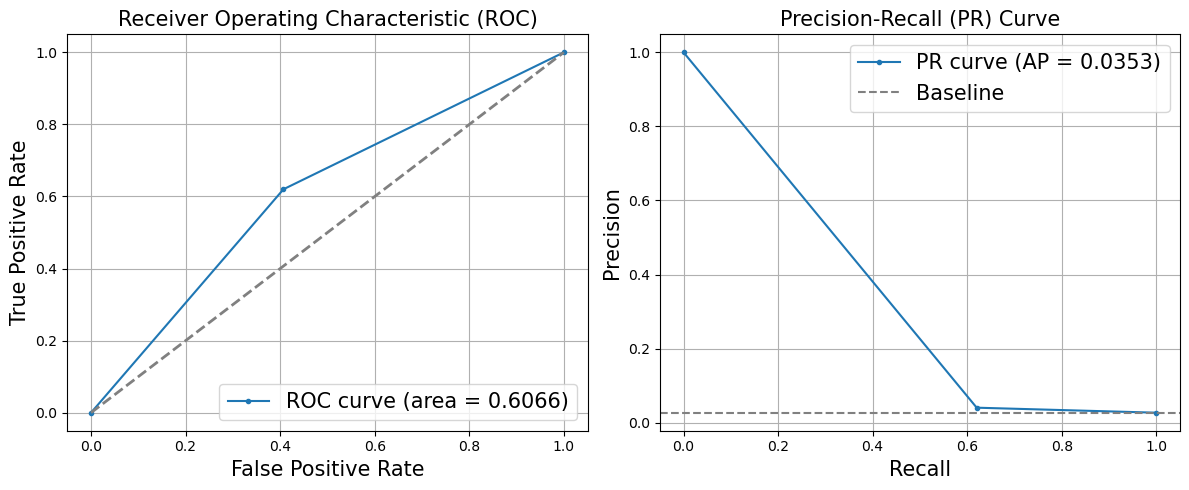

In [32]:
plot_roc_pr_graphs(best_mlp, X_test, y_test)

## Results<a class="anchor" id="Results_MLP"></a>

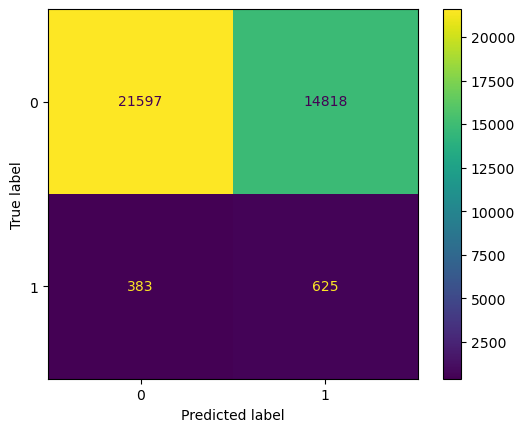

In [33]:
cm(best_mlp, X_test, y_test)

In [34]:
results_df_mlp = pd.DataFrame([['Multi-layer Perceptron Classifier', 'df_merged_zero_15x15', *save_result(best_mlp,X_test,y_test)]],
                             columns=['Model', 'Sub-Model', 'Accuracy', 'AUC_ROC','Precision','Recall', 'AP', 'f1 score'])
results_df_mlp

,Model,Sub-Model,Accuracy,AUC_ROC,Precision,Recall,AP,f1 score
0,Multi-layer Perceptron Classifier,df_merged_zero_15x15,0.593806,0.60656,0.040471,0.62004,0.035328,0.075983


In [35]:
results_df_mlp.to_csv('results/MLP_results_zero.csv')

* [Table of Contents](#Contents)

# Multi-layer Perceptron Classifier with PCA<a class="anchor" id="PCA"></a>

In [32]:
## Fit X_train, X_val, X_test with the PCA
pca = PCA(n_components = 5, random_state = 100)
pca.fit(X_train)
X_train_pc = pca.transform(X_train)
X_val_pc = pca.transform(X_val)
X_test_pc = pca.transform(X_test)
print('the shape of X_train after PCA:',X_train_pc.shape,'the shape of y train:',y_train.shape)
print('the shape of X_val after PCA:',X_val_pc.shape,'the shape of y train:',y_val.shape)
print('the shape of X_test after PCA:',X_test_pc.shape,'the shape of y test:',y_test.shape)

the shape of X_train after PCA: (112266, 5) the shape of y train: (112266,)
the shape of X_val after PCA: (37422, 5) the shape of y train: (37422,)
the shape of X_test after PCA: (37423, 5) the shape of y test: (37423,)


In [44]:
best_mlp_pc = mlp_model(X_train_pc, y_train，X_val_pc, y_val)

Best Hyperparameters: {'hidden_layer_sizes': (400, 800, 400, 200), 'activation': 'relu', 'learning_rate': 'adaptive', 'alpha': 0.0001, 'solver': 'adam'}


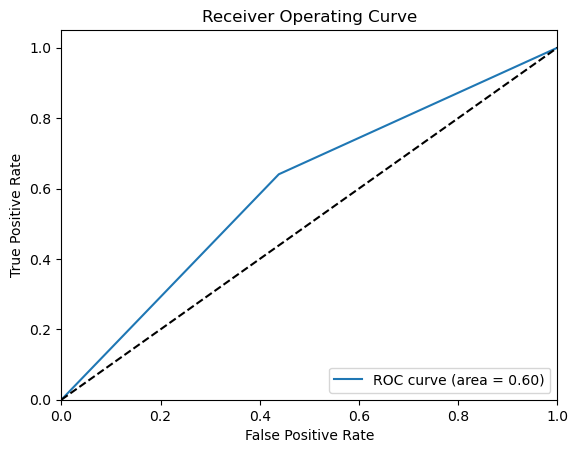

In [45]:
roc_mlp = draw_roc(best_mlp_pc, X_test_pc, y_test)

In [46]:
roc_mlp.savefig('results/ROC_mean_15x15_mlp_PCA.png')

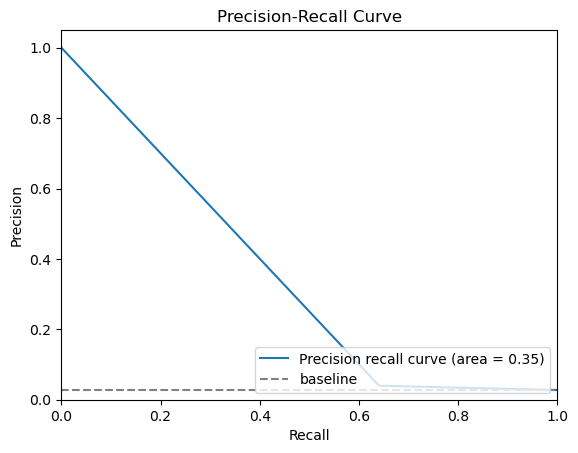

In [47]:
prc_mlp = pr_curve(best_mlp_pc, X_test_pc, y_test)

In [48]:
prc_mlp.savefig('results/PRC_mean_15x15_mlp_PCA.png')

MLPClassifier(batch_size=1000, hidden_layer_sizes=(400, 800, 400, 200),
              learning_rate='adaptive', max_iter=1000, random_state=100) 
On test data, Accuracy: 0.56
On test data, Precision: 0.04
On test data, Recall: 0.64
On test data, f1 score: 0.07 


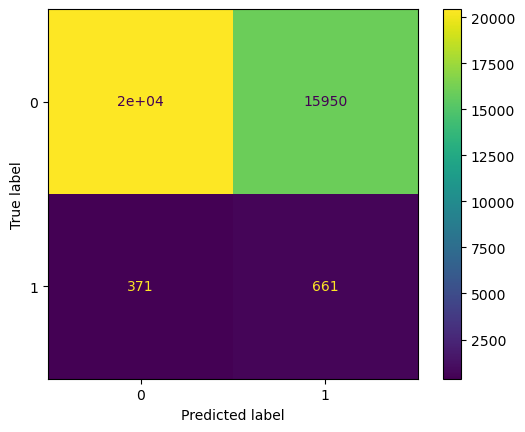

In [50]:
test_evaluation(best_mlp_pc, X_test_pc, y_test)

In [51]:
results_df_mlp = pd.DataFrame([['Multi-layer Perceptron Classifier', 'df_merged_mean_15x15', *save_result(best_mlp_pc,X_test_pc,y_test)]],
                             columns=['Model', 'Sub-Model', 'Accuracy', 'AUC_ROC','Precision','Recall', 'AUC_PRC', 'f1 score'])
results_df_mlp

,Model,Sub-Model,Accuracy,AUC_ROC,Precision,Recall,AUC_PRC,f1 score
0,Multi-layer Perceptron Classifier,df_merged_mean_15x15,0.563878,0.601104,0.039793,0.640504,0.345105,0.074931


In [52]:
results_df_mlp.to_csv('results/results_mean_15x15_mlp_PCA.csv')

* [Table of Contents](#Contents)